<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


In [84]:
!unzip Archive.zip


Archive:  Archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Archive.zip or
        Archive.zip.zip, and cannot find Archive.zip.ZIP, period.


In [0]:
real_images_array = [cv2.imread(file) for file in glob.glob("real/*.jpg")]

fake_images_array =  [cv2.imread(file) for file in glob.glob("fake/*.jpg")]

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real', '*.JPG', '%s'+ " real")
rename('fake', '*.JPG', '%s'+ " fake")
rename('real', '*.jpg', '%s'+ " real")
rename('fake', '*.jpg', '%s'+ " fake")

In [0]:
# prepare data
import random
train_real = ['./real/{}'.format(i) for i in os.listdir("real") if 'real' in i]
train_fake = ['./fake/{}'.format(i) for i in os.listdir("fake") if 'fake' in i]
train_images = train_fake + train_real
random.shuffle(train_images)

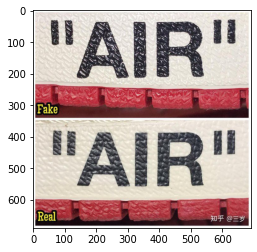

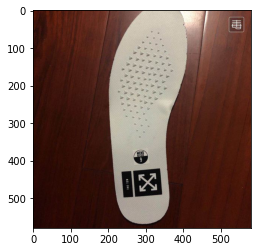

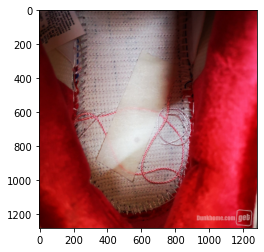

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
rm -r fake

In [0]:
# conver all images to array
from skimage.transform import resize
from skimage import data

#resize our array
for i in range(len(real_images_array)):
  real_images_array[i] = resize(real_images_array[i], (256,256))

for i in range(len(fake_images_array)):
  fake_images_array[i] = resize(fake_images_array[i], (256,256))

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential

In [0]:
model = Sequential()

#add conv1
model.add(Conv2D(4,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(256,256,1)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(2, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)

r = model.fit(real_image_array,fake_images_array,batch_size=100,epochs=50)

ValueError: ignored